In [1]:
# 📦 تثبيت مكتبة Ultralytics التي تحتوي على YOLOv8
!pip install ultralytics


In [2]:
# 📚 استيراد مكتبة YOLO
from ultralytics import YOLO
import os
import torch

# 🔍 التأكد مما إذا كانت CUDA (GPU) متاحة
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"🚀 سيتم استخدام الجهاز: {device}")


🚀 سيتم استخدام الجهاز: cuda


In [3]:
 # 📥 تحميل نموذج YOLOv8n (النسخة الخفيفة Nano) مُسبق التدريب
model = YOLO('yolov8n.pt')

# ⚡ نقل النموذج إلى الجهاز المناسب (CUDA أو CPU)
model.to(device)


YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(16, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C2f(
        (cv1): Conv(
          (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(48, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_s

In [4]:
# 🗂️ تحديد مسار ملف data.yaml الذي يحتوي على بيانات التصنيفات
data_yaml_path = r'C:\Users\Classic\Desktop\pr\2\data.yaml'


In [13]:

print(f"✅ الجهاز المستخدم للتدريب: {model.device}")

# ✅ تفعيل وضع التدريب الخفيف (نصيحة مهمة لتسريع التدريب بجهازات متوسطة)
#    بعض الإصدارات تقبل augment=False، لو ما قبلها نحذف السطر ببساطة بدون مشكلة

from ultralytics import YOLO

# تحميل الوزن المحفوظ
model = YOLO(r'C:/Users/Classic/Desktop/pr/V2/runs/detect/train/weights/last.pt')# تأكد من المسار

# بدء التدريب لإكمال الباقي
results = model.train(
    data=data_yaml_path,
    epochs=10,          # فقط 10 دورات لأنك تريد تكمل
    imgsz=1024,
    batch=1,
    device=0,
    workers=0,
    patience=50,
    verbose=True,
    save=True,
    save_period=5,      # حفظ كل 5 دورات مثلاً
    exist_ok=True,
)


✅ الجهاز المستخدم للتدريب: None
New https://pypi.org/project/ultralytics/8.3.118 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.115  Python-3.9.13 torch-2.1.0+cu118 CUDA:0 (Quadro M2000M, 4096MiB)
engine\trainer: task=detect, mode=train, model=C:/Users/Classic/Desktop/pr/V2/runs/detect/train/weights/last.pt, data=C:\Users\Classic\Desktop\pr\2\data.yaml, epochs=10, time=None, patience=50, batch=1, imgsz=1024, save=True, save_period=5, cache=False, device=0, workers=0, project=None, name=train, exist_ok=True, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=

train: Scanning C:\Users\Classic\Desktop\pr\2\train\labels.cache... 277 images, 0 backgrounds, 0 corrupt: 100%|██████████| 277/277 [00:00<?, ?it/s]

val: Fast image access  (ping: 0.10.0 ms, read: 1149.4138.3 MB/s, size: 318.7 KB)



val: Scanning C:\Users\Classic\Desktop\pr\2\valid\labels.cache... 80 images, 0 backgrounds, 0 corrupt: 100%|██████████| 80/80 [00:00<?, ?it/s]

Plotting labels to runs\detect\train\labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000435, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 1024 train, 1024 val
Using 0 dataloader workers
Logging results to runs\detect\train
Starting training for 10 epochs...
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10     0.604G      1.418      1.391     0.9487         19       1024: 100%|██████████| 277/277 [02:03<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:09<00:00,  4.02it/s]

                   all         80       1520      0.603      0.675       0.66      0.341



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10     0.604G      1.477      1.402     0.9534         19       1024: 100%|██████████| 277/277 [02:03<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:10<00:00,  3.96it/s]

                   all         80       1520      0.574      0.676      0.649      0.337



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10     0.604G      1.429      1.392     0.9476         15       1024: 100%|██████████| 277/277 [02:00<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:09<00:00,  4.06it/s]

                   all         80       1520      0.611      0.648      0.657      0.347



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10     0.604G      1.406      1.398     0.9505         15       1024: 100%|██████████| 277/277 [02:00<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:09<00:00,  4.15it/s]

                   all         80       1520      0.599      0.675      0.663      0.346



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10     0.604G      1.399      1.373     0.9454         19       1024: 100%|██████████| 277/277 [02:00<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:09<00:00,  4.13it/s]

                   all         80       1520      0.635      0.659      0.673      0.347



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10     0.604G      1.402      1.368     0.9468         19       1024: 100%|██████████| 277/277 [02:00<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:09<00:00,  4.05it/s]

                   all         80       1520      0.598      0.673      0.664      0.344



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10     0.604G      1.397      1.347     0.9409         19       1024: 100%|██████████| 277/277 [02:01<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:09<00:00,  4.03it/s]

                   all         80       1520      0.624      0.692      0.684      0.352



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10     0.604G      1.369      1.342      0.936         19       1024: 100%|██████████| 277/277 [02:01<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:09<00:00,  4.16it/s]

                   all         80       1520      0.629       0.68      0.682      0.355



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10     0.604G      1.377      1.341     0.9383         19       1024: 100%|██████████| 277/277 [02:01<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:09<00:00,  4.10it/s]

                   all         80       1520      0.628      0.676      0.686      0.354



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10     0.604G      1.379      1.334     0.9361         19       1024: 100%|██████████| 277/277 [02:00<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:09<00:00,  4.09it/s]

                   all         80       1520      0.623      0.667      0.682      0.354



10 epochs completed in 0.367 hours.
Optimizer stripped from runs\detect\train\weights\last.pt, 6.3MB
Optimizer stripped from runs\detect\train\weights\best.pt, 6.3MB

Validating runs\detect\train\weights\best.pt...
Ultralytics 8.3.115  Python-3.9.13 torch-2.1.0+cu118 CUDA:0 (Quadro M2000M, 4096MiB)
Model summary (fused): 72 layers, 3,009,353 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:09<00:00,  4.07it/s]


                   all         80       1520      0.626      0.681      0.681      0.355
  Anterior nasal spine         80         80      0.538      0.611      0.543      0.237
            Articulare         80         80      0.607      0.487      0.523      0.255
              Gnathion         80         80      0.747      0.938      0.957       0.55
                Gonion         80         80      0.231      0.163      0.223     0.0883
     Incision inferius         80         80      0.797       0.75      0.842      0.449
     Incision superius         80         80       0.85      0.912      0.943      0.598
             Lower lip         80         80      0.565      0.862      0.785      0.393
                Menton         80         80       0.65      0.975      0.942      0.506
                Nasion         80         80      0.794        0.8      0.847      0.473
              Orbitale         80         80      0.408      0.388      0.376      0.151
              Pogonio

In [14]:
# ✅ تقييم أداء النموذج على بيانات التحقق
metrics = model.val(data=data_yaml_path, device=device)



Ultralytics 8.3.115  Python-3.9.13 torch-2.1.0+cu118 CUDA:0 (Quadro M2000M, 4096MiB)
Model summary (fused): 72 layers, 3,009,353 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access  (ping: 0.10.0 ms, read: 345.3380.0 MB/s, size: 324.1 KB)


val: Scanning C:\Users\Classic\Desktop\pr\2\valid\labels.cache... 80 images, 0 backgrounds, 0 corrupt: 100%|██████████| 80/80 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 80/80 [00:09<00:00,  8.70it/s]


                   all         80       1520      0.629      0.679      0.683      0.357
  Anterior nasal spine         80         80      0.526       0.61      0.545      0.235
            Articulare         80         80      0.607      0.487      0.525      0.258
              Gnathion         80         80      0.761      0.938      0.961      0.548
                Gonion         80         80      0.239      0.165       0.23     0.0898
     Incision inferius         80         80      0.818       0.75      0.841       0.45
     Incision superius         80         80       0.86      0.912      0.943      0.615
             Lower lip         80         80      0.564      0.857      0.783      0.393
                Menton         80         80      0.641      0.963      0.937      0.508
                Nasion         80         80      0.805        0.8      0.847      0.477
              Orbitale         80         80      0.413      0.375      0.369      0.148
              Pogonio

In [15]:
# 🔮 استخدام النموذج المدرب للتنبؤ على مجلد الصور الخاص بالاختبار
model.predict(
    source=r'C:\Users\Classic\Desktop\pr\2\test\images',
    save=True,
    device=device
)




image 1/40 C:\Users\Classic\Desktop\pr\2\test\images\007_jpg.rf.1c884be467ec6438a61773295a8ca763.jpg: 1024x832 1 Anterior nasal spine, 1 Articulare, 1 Gnathion, 1 Incision superius, 1 Lower lip, 1 Menton, 1 Nasion, 1 Pogonion, 1 Posterior nasal spine, 1 Sella, 60.6ms
image 2/40 C:\Users\Classic\Desktop\pr\2\test\images\015_jpg.rf.6b8b6a3f9776a588d66e151cf1e4c8b4.jpg: 1024x832 1 Incision inferius, 1 Incision superius, 1 Lower lip, 1 Menton, 1 Nasion, 1 Posterior nasal spine, 1 Upper lip, 55.6ms
image 3/40 C:\Users\Classic\Desktop\pr\2\test\images\022_jpg.rf.7a1ce016626d1660a1b7f7775c378527.jpg: 1024x832 1 Anterior nasal spine, 1 Gnathion, 1 Incision inferius, 1 Incision superius, 1 Lower lip, 1 Menton, 1 Nasion, 1 Pogonion, 1 Posterior nasal spine, 1 Sella, 1 Subnasale, 55.9ms
image 4/40 C:\Users\Classic\Desktop\pr\2\test\images\043_jpg.rf.328789f3fdf95820088475f3eeb33ac5.jpg: 1024x832 1 Anterior nasal spine, 1 Articulare, 1 Gnathion, 1 Incision inferius, 1 Incision superius, 1 Lower l

image 30/40 C:\Users\Classic\Desktop\pr\2\test\images\318_jpg.rf.2c06f4f5b50c0d10df39282beabf8889.jpg: 1024x832 1 Anterior nasal spine, 1 Incision superius, 1 Menton, 1 Nasion, 1 Posterior nasal spine, 1 Sella, 1 Subnasale, 72.5ms
image 31/40 C:\Users\Classic\Desktop\pr\2\test\images\326_jpg.rf.6cdcc9668195d783129ad87bdde6eb46.jpg: 1024x832 1 Articulare, 1 Gnathion, 1 Incision inferius, 1 Incision superius, 1 Lower lip, 2 Mentons, 1 Pogonion, 1 Posterior nasal spine, 1 Sella, 1 Subnasale, 1 Subspinale, 1 Supramentale, 1 Upper lip, 72.6ms
image 32/40 C:\Users\Classic\Desktop\pr\2\test\images\331_jpg.rf.efb5ef74c346e56bc48eb242b993180e.jpg: 1024x832 1 Anterior nasal spine, 1 Gnathion, 1 Incision superius, 1 Lower lip, 1 Menton, 1 Nasion, 1 Orbitale, 1 Posterior nasal spine, 1 Sella, 1 Subnasale, 73.2ms
image 33/40 C:\Users\Classic\Desktop\pr\2\test\images\337_jpg.rf.0fef6097d3ee6fb56da0eeaac2a58d25.jpg: 1024x832 2 Anterior nasal spines, 1 Incision inferius, 1 Incision superius, 1 Lower l

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'Anterior nasal spine', 1: 'Articulare', 2: 'Gnathion', 3: 'Gonion', 4: 'Incision inferius', 5: 'Incision superius', 6: 'Lower lip', 7: 'Menton', 8: 'Nasion', 9: 'Orbitale', 10: 'Pogonion', 11: 'Porion', 12: 'Posterior nasal spine', 13: 'Sella', 14: 'Soft tissue pogonion', 15: 'Subnasale', 16: 'Subspinale', 17: 'Supramentale', 18: 'Upper lip'}
 obb: None
 orig_img: array([[[220, 220, 220],
         [220, 220, 220],
         [220, 220, 220],
         ...,
         [223, 223, 223],
         [220, 220, 220],
         [  0,   0,   0]],
 
        [[220, 220, 220],
         [220, 220, 220],
         [220, 220, 220],
         ...,
         [223, 223, 223],
         [220, 220, 220],
         [  0,   0,   0]],
 
        [[220, 220, 220],
         [220, 220, 220],
         [220, 220, 220],
         ...,
         [223, 223, 223],
         [220, 22

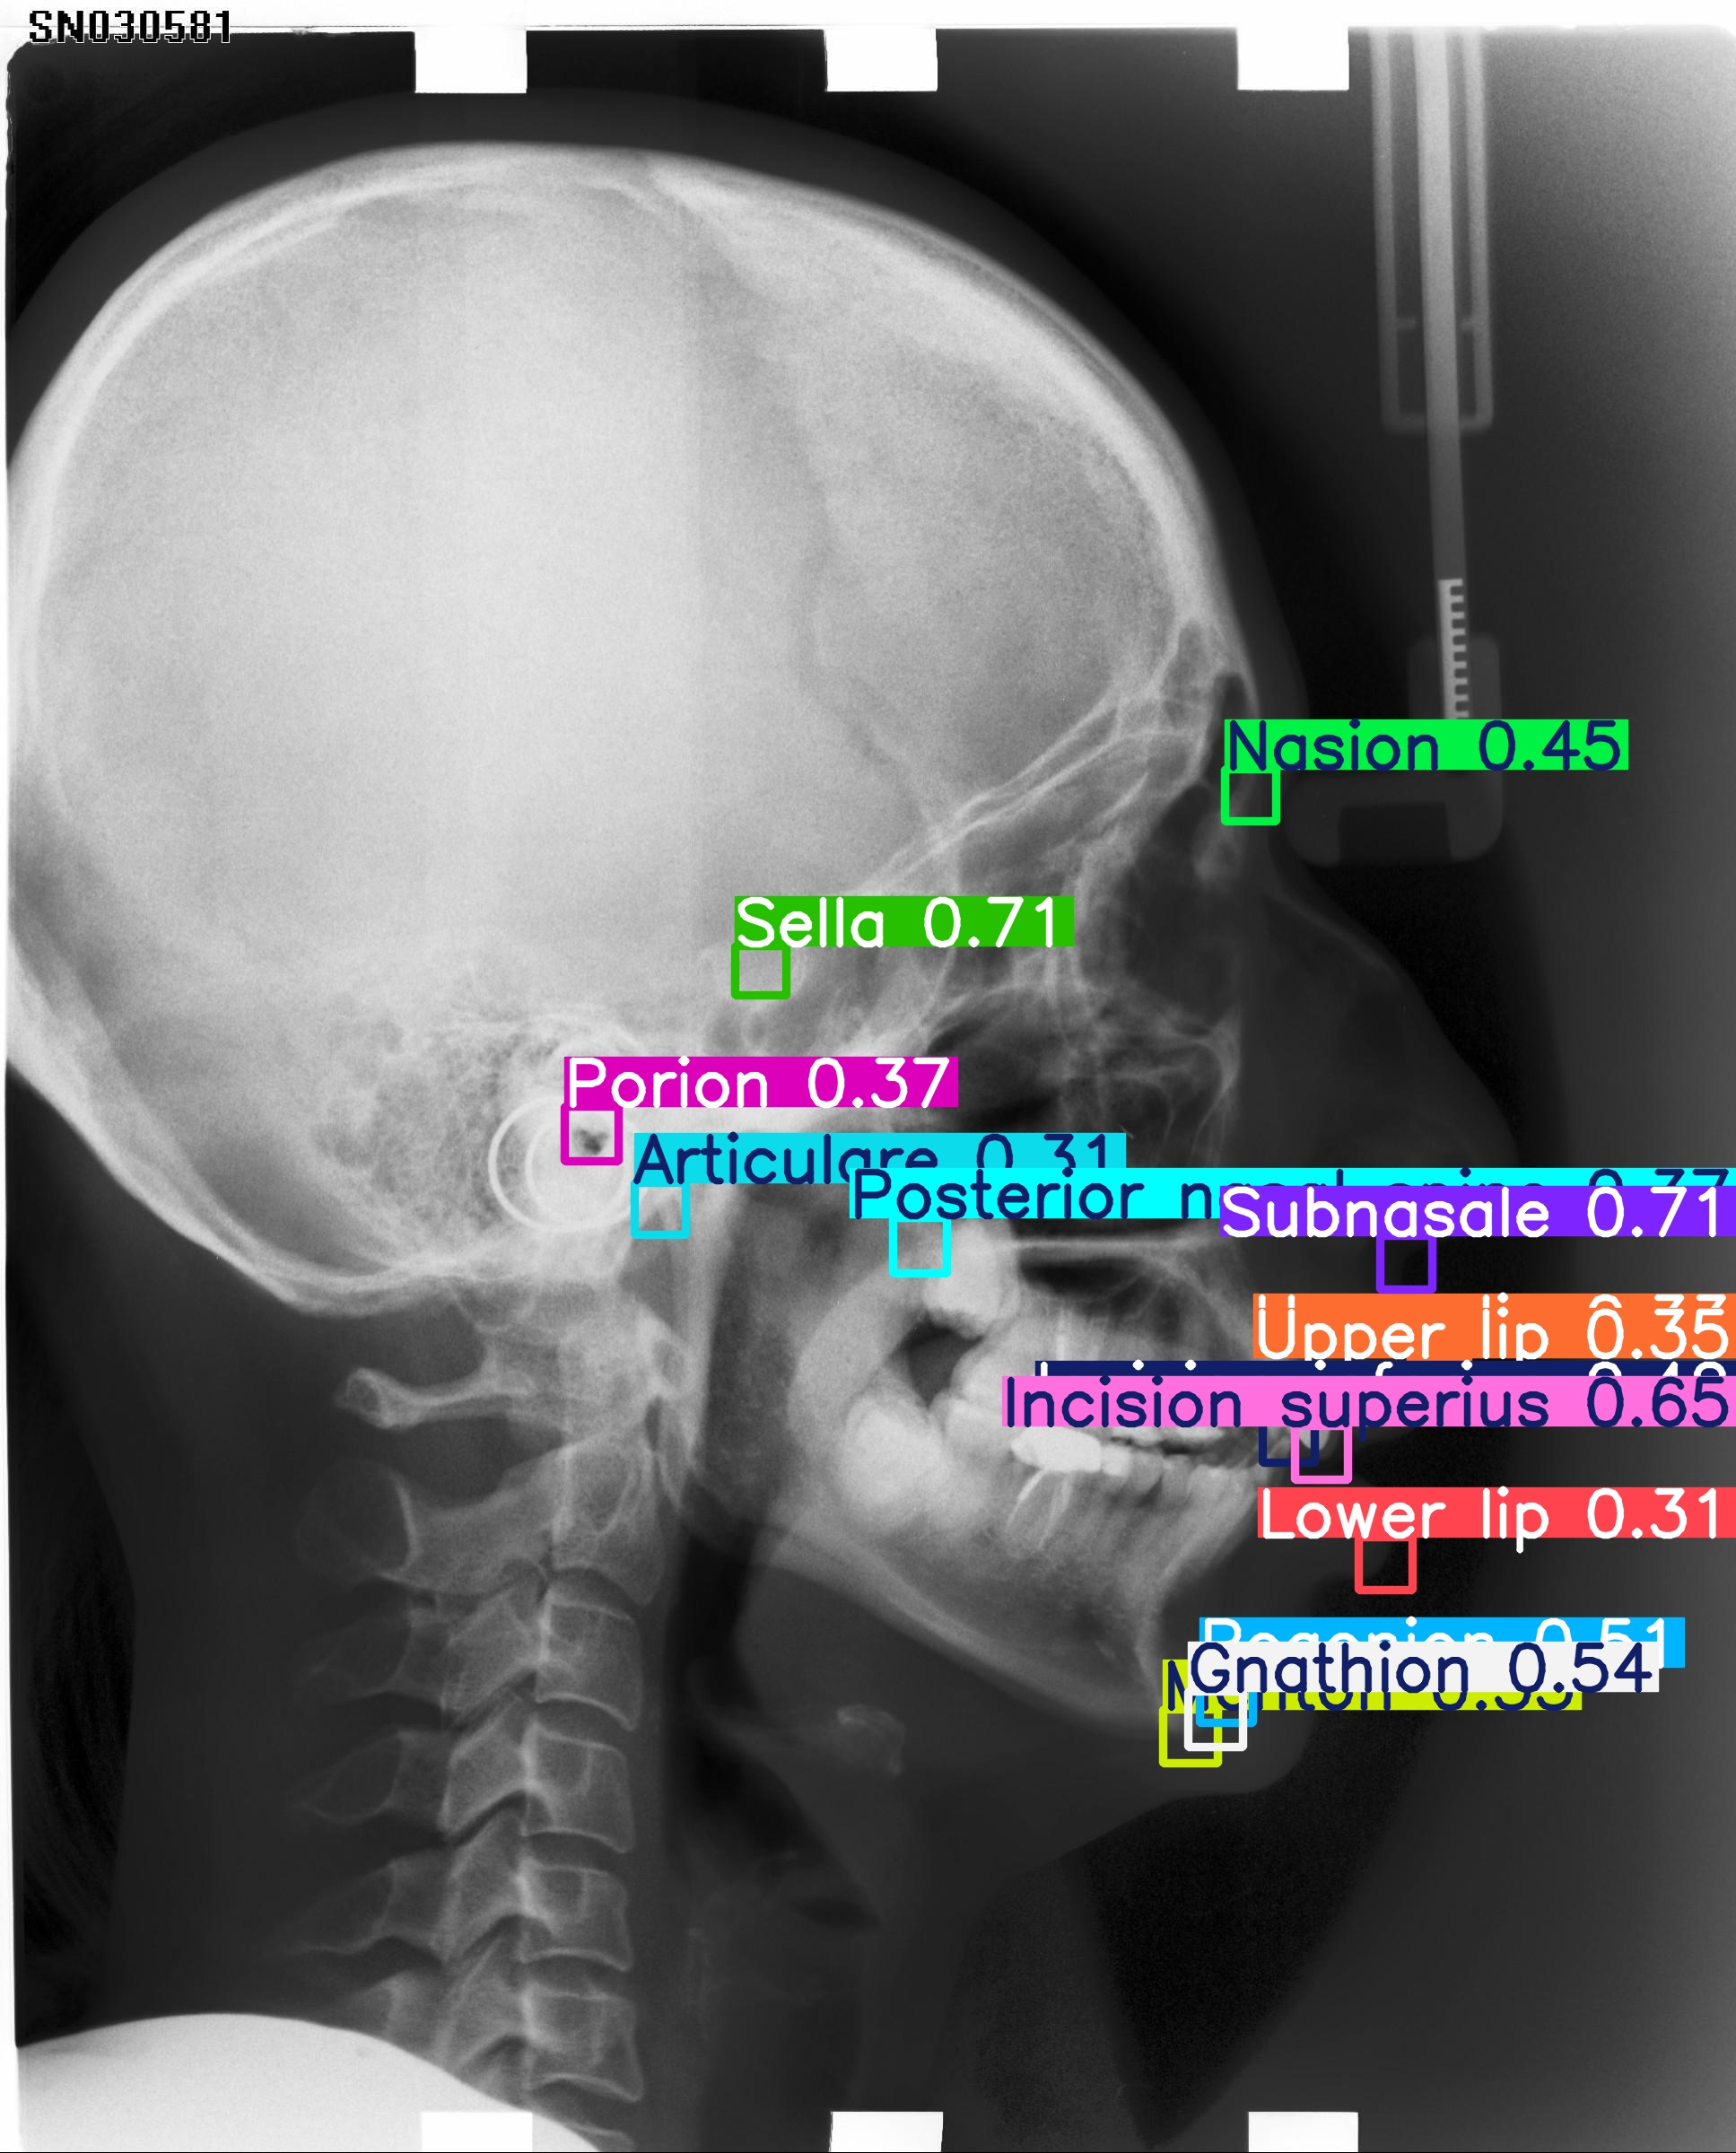

In [33]:
# 🖼️ عرض صورة تم تنفيذ التنبؤ عليها
from IPython.display import Image, display

# ⚠️ غير اسم الصورة حسب الناتج الموجود عندك في مجلد runs/detect/predict/
image_path = r'C:\Users\Classic\Desktop\pr\V2\runs\detect\train\295_jpg.rf.1ec4aa0c3c3689d4ad5e4637c7012ba9.jpg'

display(Image(filename=image_path))


In [21]:
!pip install onnx

In [25]:
!pip install onnxruntime


  Using cached onnxruntime-1.19.2-cp39-cp39-win_amd64.whl (11.1 MB)


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\Classic\\anaconda3\\Lib\\site-packages\\onnxruntime\\capi\\onnxruntime_providers_shared.dll'
Consider using the `--user` option or check the permissions.



In [27]:
# 📤 تصدير النموذج المدرب بصيغة ONNX لاستخدامه في تطبيقات أخرى
model.export(format='onnx')


Ultralytics 8.3.115  Python-3.9.13 torch-2.1.0+cu118 CPU (Intel Core(TM) i7-6820HQ 2.70GHz)

PyTorch: starting from 'runs\detect\train\weights\best.pt' with input shape (1, 3, 1024, 1024) BCHW and output shape(s) (1, 23, 21504) (6.0 MB)

ONNX: starting export with onnx 1.17.0 opset 17...
ONNX: slimming with onnxslim 0.1.50...
ONNX: export success  2.3s, saved as 'runs\detect\train\weights\best.onnx' (11.9 MB)

Export complete (3.1s)
Results saved to C:\Users\Classic\Desktop\pr\V2\runs\detect\train\weights
Predict:         yolo predict task=detect model=runs\detect\train\weights\best.onnx imgsz=1024  
Validate:        yolo val task=detect model=runs\detect\train\weights\best.onnx imgsz=1024 data=C:\Users\Classic\Desktop\pr\2\data.yaml  
Visualize:       https://netron.app


'runs\\detect\\train\\weights\\best.onnx'